In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  # matplotlib ke endr pyplot voh module hai jisse hm plotting ker skte hai.
import seaborn as sns


In [2]:
# Create a DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head() # default 5 will be showen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn (Customer Gone)
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head(10) # if we put any number like for e.g:10 (0-9) will be showen.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn (Customer Gone)
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# First Step is to Inspect the data

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

# From the information we came to know that where the value is in Alphanumeric type, there the type object appears.
## "total charges" should be float but it is object which means there is some error in it. 
## So we saw in excel file that even though the total charges field Contains blank, thats why datatye object is showing. So we will replace it with 0, this will remove the error.

# Replacing Blank With 0 as Tenure is 0 and no total charges are recorded.

In [6]:
df["TotalCharges"]= df["TotalCharges"].replace(" ",0)

# Changing column DataType by .astype function.

In [7]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

# Check again type of column by .info()

In [8]:
df.info()

#  19  TotalCharges           7043 non-null   float64                   <--- CHANGED from obj to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

# Checking Null values by .isnull() function

In [9]:
df.isnull() # tell where we have null values in our data.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn (Customer Gone)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum() # it gives more brief info - it gives 1 & 0 only for an column if anywhere iside a column there is a null value present 1 reflects, otherwise 0.
                  # Earlier it was showing row wise true and false, now it will be compacted, any column which has null value will become 1, simple.

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn (Customer Gone)    0
dtype: int64

In [11]:
df.isnull().sum().sum()  #more brief info for null values present or not.
                         # If there is any null value in the whole data then 1 will be shown otherwise 0...

np.int64(0)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.duplicated()  # give true / fALSE IF any of row contains duplicate data.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [14]:
df.duplicated().sum()  # give brief info in 0,1 when duplicate data presents in our dataset.

np.int64(0)

In [15]:
df["customerID"].duplicated().sum()  # find duplicate on the basis of a specific column ,
                                      # Customer ID cannot be duplicate so in this we will check whether there are any duplicate entries or not.

# 0 output means no duplicates were found...

np.int64(0)

## Data in Senior Citizen column is entered in the form of 0,1 and rest of the columns are yes/No. 
## So convert Senior Citizen column 0/1 to yes/No.
## Why? because it will make it easier to understand for others.

In [16]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)



In [17]:
df.head() # see SeniorCitizen Column values are changed in yes & no.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn (Customer Gone)
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


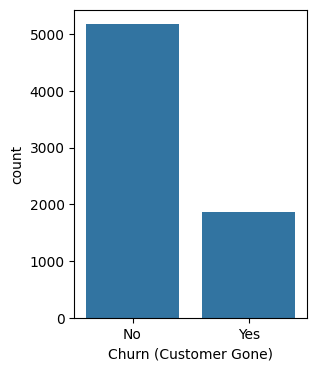

In [18]:
plt.figure(figsize=(3,4))  # for resizing plots
sns.countplot(x="Churn (Customer Gone)",data = df) 
plt.show()

# Their values ​​are not being shown above the bars.
## How to show them 👇

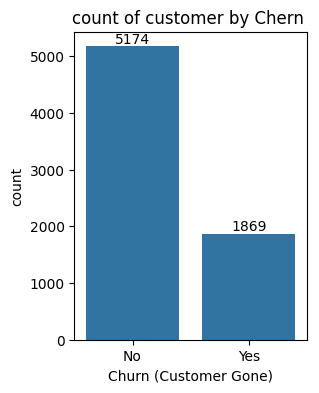

In [19]:
plt.figure(figsize=(3,4))  # for resizing plots
ax = sns.countplot(x="Churn (Customer Gone)",data = df) 
ax.bar_label(ax.containers[0])
plt.title ("count of customer by Chern ")
plt.show()

# To show in % we use Pie chart

                       Churn (Customer Gone)
Churn (Customer Gone)                       
No                                      5174
Yes                                     1869


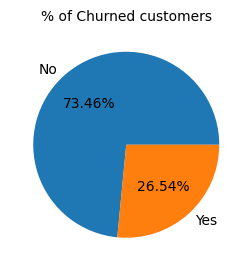

In [20]:
plt.figure(figsize=(3,4))  # for resizing plots
gb = df.groupby("Churn (Customer Gone)").agg({"Churn (Customer Gone)":"count"}) # We use group by for making Pie Chart
print(gb)
plt.pie(gb["Churn (Customer Gone)"],labels = gb.index,autopct = "%1.2f%%")           # AUTOPCT for %age
plt.title ("% of Churned customers",fontsize = 10)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have Churned out.

#let's Explore the reason behind it

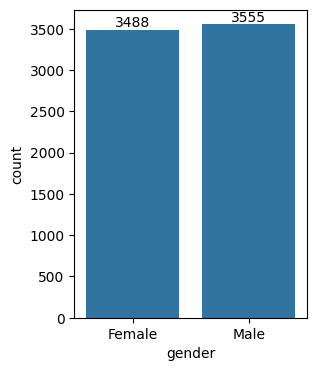

In [21]:
plt.figure(figsize=(3,4))  # for resizing plots
ax = sns.countplot(x= "gender",data = df)
ax.bar_label(ax.containers[0])                # this line is for showing values above the bars.
plt.show()

# Churned customers are not Gender specific 👇

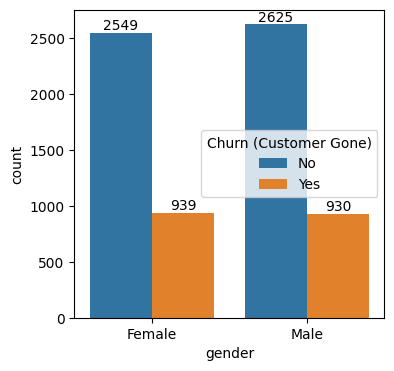

In [22]:
plt.figure(figsize=(4,4))  # for resizing plots
ax =sns.countplot(x= "gender",data = df,hue="Churn (Customer Gone)")
ax.bar_label(ax.containers[0]) # for blue bar values
ax.bar_label(ax.containers[1])  # for Orange bar values
plt.show()

##### In the above chart the legends are coming in the middle of the chart, there will be a problem in reading the chart so use the code to move the legend to the side 👇👇

### Customize Legend Loaction👇👇

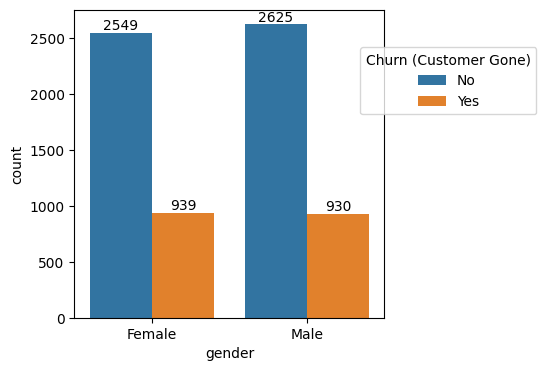

In [23]:
plt.figure(figsize=(4,4))  # for resizing plots
ax =sns.countplot(x= "gender",data = df,hue="Churn (Customer Gone)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.legend(title="Churn (Customer Gone)",bbox_to_anchor =(0.9,0.9))     # Customize Legend Loaction


plt.show()

# COUNT OF SENIOR CITIZEN

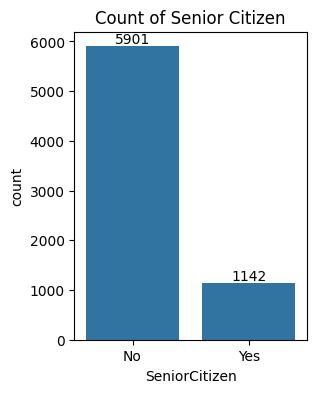

In [24]:
plt.figure(figsize=(3,4))  # for resizing plots
ax = sns.countplot(x= "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])                                # this line is for showing values above the bars.
plt.title("Count of Senior Citizen")               # for giving charts title             
plt.show()

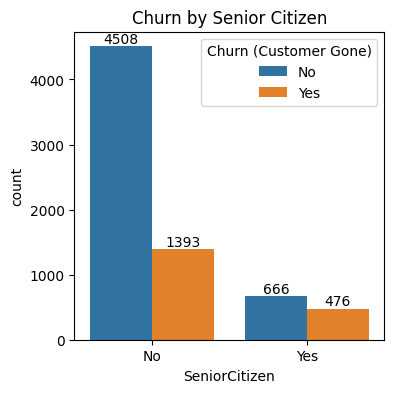

In [25]:
plt.figure(figsize=(4,4))  # for resizing plots
ax = sns.countplot(x= "SeniorCitizen",data = df,hue="Churn (Customer Gone)")
ax.bar_label(ax.containers[0])         
ax.bar_label(ax.containers[1])    # this line is for showing values above the bars.
plt.title("Churn by Senior Citizen")       # for giving charts title                        
plt.show()

### -----------Comparative a greater % off people in senior citizen category have churned -------------

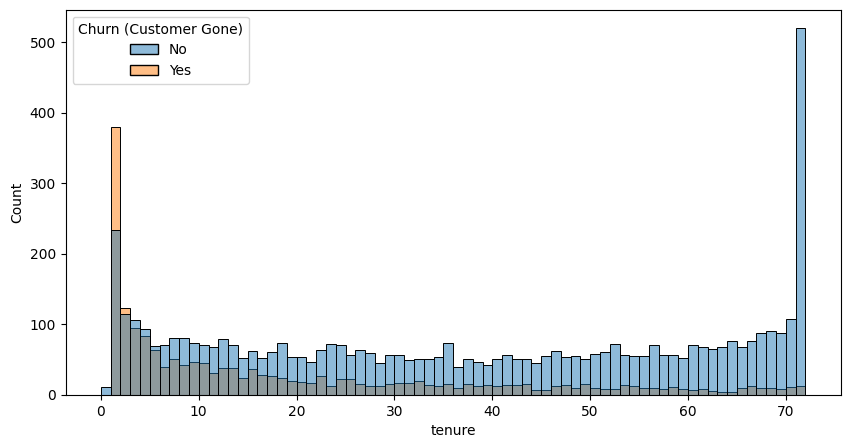

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(x="tenure" ,data = df,bins=72,hue = "Churn (Customer Gone)")
plt.show()
           

# people who have used ourservices for a long time have stayed and people who have used our sevices 1 or 2 months have churned.

### Count of customers by contract

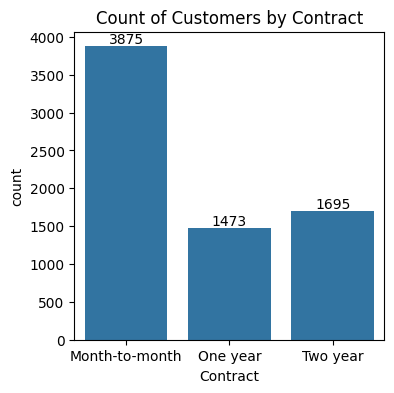

In [27]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x="Contract",data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()


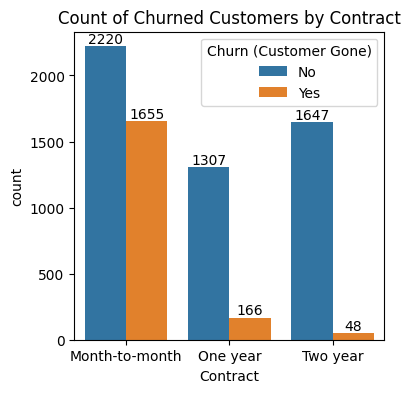

In [31]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x="Contract",data= df,hue = "Churn (Customer Gone)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customers by Contract")
plt.show()


#### People who have month to month contract are likely to churn then from those who has 1 or 2 years of contract.

In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn (Customer Gone)'], dtype=object)

## The services column is from [phone services] to [streaming movies] . 
## So if we plot all these columns separately then there will be many charts, so we will plot them all together and use sub-plots.

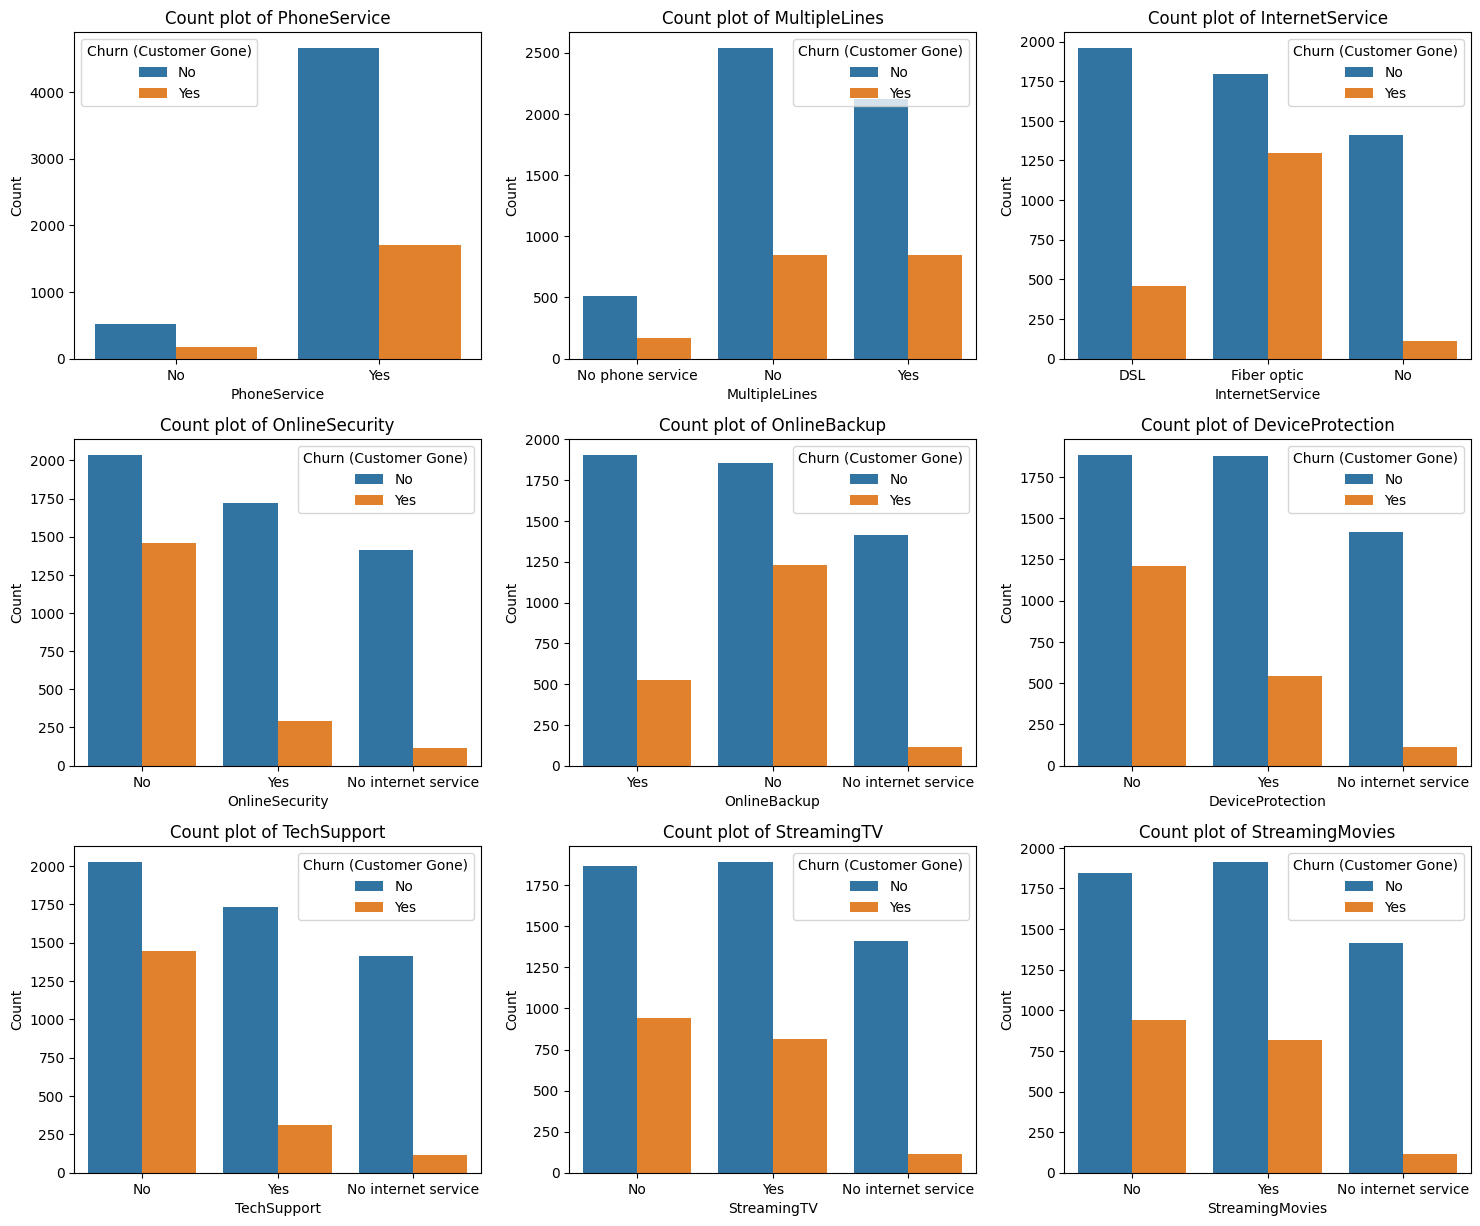

In [81]:
Columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

# number of columns for the subplot grid 
n_cols = 3
n_rows= (len(Columns) + n_cols + 1) // n_cols

# Create Subplots
#axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows *4))  # Adjust figsize as needed

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,n_rows *4))  

# Using the subplot we have plotted the structure with the help of rows and columns, in which the graph will be made.
# And we have also set the figure size. In the subplot we have to give more size, a little height X width.

# Flatten thw axes array for any iteration ( handle both 1D and 2D arrays)
axes = axes.flatten()

# Turning off all the axes , so when we plot soething then only we on the axes otherwise not, benefit of this is the empty plots will not shown
# for ax in axes:
#     ax.set_axis_off()

#Iterate over columns and plot count plots.
for i,col in enumerate(Columns):  # Whenever we write enumeration, the value will be given in both (i,Col). First I will have index and second I will have column name.
    sns.countplot(x=col,data=df, ax = axes[i], hue = df["Churn (Customer Gone)"])
    # print(i)
    # print(col) # for our understanding 
    
    # on the axes first
   # axes[i].set_axis_on()   # All the axes were off, now wherever the plot is it will be on, but the space is empty because of this...🤔

    # giving Labels.
    axes[i].set_title(f"Count plot of {col}")  # When setting the title of the axes, it is done by writing set_title like this. When doing a simple plot, it is done by writing plt.title() like this.
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
   

############ Remove empty subplots if any        
for j in range(i+1 ,len(axes)):     # len(axes) = 9 
     fig.delaxes(axes[j]) 

plt.tight_layout() # This corrects the overlapping of one another.
plt.show()

The majority of customers who lesser churn tend to have services like PhoneSevices , InternetServices (Particularly DSL) and OnlineSecurity enabled,OnlineBackup,TechSupport And Streaming Tv.
Churn Rates are noticeably higher when these services are not used or are unavailable..

## Churnd ustomers by Payment Method

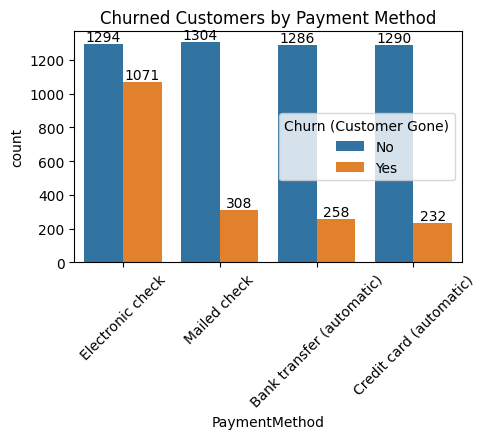

In [94]:
plt.figure(figsize=(5,3))
ax= sns.countplot(x="PaymentMethod",data= df,hue = "Churn (Customer Gone)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)  # for rotating x axis labels we use xticks, it used when labels are too large.
plt.show()

##### Customer is likely to churn when he is using electronic check as a payment method. 👆